## PV Power

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pv_table = pd.read_excel('Power over time.xlsx')

In [3]:
pv_table

,Date,Time,PV Productie (W)
0,2020-04-17,00:00:00,0.0
1,2020-04-17,00:15:00,0.0
2,2020-04-17,00:30:00,0.0
3,2020-04-17,00:45:00,0.0
4,2020-04-17,01:00:00,0.0
...,...,...,...
4795,2020-06-05,22:45:00,0.0
4796,2020-06-05,23:00:00,0.0
4797,2020-06-05,23:15:00,0.0
4798,2020-06-05,23:30:00,0.0


Let's take June as Test set

In [21]:
pv_table_train = pv_table[pv_table.Date <'2020-06-01']
pv_table_test = pv_table[pv_table.Date >= '2020-06-01']

### Baseline Model

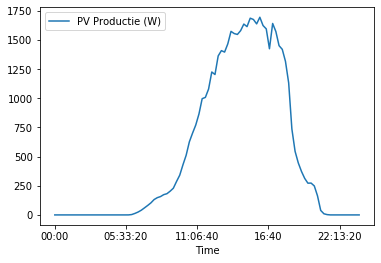

In [23]:
#Baseline (plain average per time)
pv_table_train.groupby('Time').mean().to_csv('baseline.csv')
pv_table_train.groupby('Time').mean().plot()

In [26]:
#5 days of prediction
pv_table_test.Date.unique()

array(['2020-06-01T00:00:00.000000000', '2020-06-02T00:00:00.000000000',
       '2020-06-03T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-06-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [45]:
predictions_1 = pd.read_csv('baseline.csv')

In [46]:
pv_table_test.loc[:,'Predictions'] = list(predictions_1['PV Productie (W)']) * 5

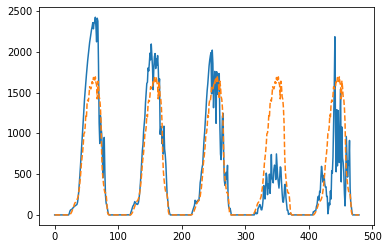

In [58]:
rg = range(len(pv_table_test.Date))
plt.plot(rg, pv_table_test['PV Productie (W)'])
plt.plot(rg, pv_table_test['Predictions'], linestyle='dashed')

In [61]:
pv_errors = pv_table_test[pv_table_test['PV Productie (W)']!= 0]

In [65]:
# mean squared error
mse = np.sum((pv_errors['Predictions'] - pv_errors['PV Productie (W)'])**2)
# root mean squared error
rmse = np.sqrt(mse/len(pv_errors))

In [72]:
# coefficient of variation
rmse/pv_errors['PV Productie (W)'].mean()

0.6612969656338678

In [73]:
#  total sum of squares
sst = np.sum((pv_errors['PV Productie (W)'] - np.mean(pv_errors['PV Productie (W)']))**2)
# R2 score
r2_score = 1 - (mse/sst)

In [74]:
r2_score

0.5084855723740141

Source 1: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/  
Source 2: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b  
Source 3: https://www.kaggle.com/robikscube/tutorial-time-series-forecasting-with-xgboost
Source 4:https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

### Autoregressive Moving Average (ARMA)

In [75]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random

[0.36108098]


In [80]:
#list(pv_table_train['PV Productie (W)'])

In [81]:
# contrived dataset
data = list(pv_table_train['PV Productie (W)'])
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)

In [87]:
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[20.44087077]
